In [1]:
import io
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

 - https://stackoverflow.com/questions/31690134/python-statsmodels-help-using-arima-model-for-time-series
 - https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMA.html
 - https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model
 - https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html
 - https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
 - https://machinelearningmastery.com/make-sample-forecasts-arima-python/
 - https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html#statsmodels.tsa.arima_model.ARIMAResults.forecast
 - https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html#statsmodels.tsa.arima_model.ARIMAResults.predict

```
# Setting up a data frame that looks twenty days into the past,
# and has linear data, from approximately 1 through 20
counts = np.arange(1, 21) + 0.2 * (np.random.random(size=(20,)) - 0.5)
start = dt.datetime.strptime("1 Nov 01", "%d %b %y")
daterange = pd.date_range(start, periods=20)
table = {"count": counts, "date": daterange}
data = pd.DataFrame(table)
data.set_index("date", inplace=True)
```

In [2]:
raw = io.StringIO("""date        count
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603""")
data = pd.read_fwf(raw, parse_dates=['date'], index_col='date')

In [3]:
data

,count
date,
2001-11-01,0.998543
2001-11-02,1.914526
2001-11-03,3.057407
2001-11-04,4.044301
2001-11-05,4.952441
2001-11-06,6.002932
2001-11-07,6.930134
2001-11-08,8.011137
2001-11-09,9.040393


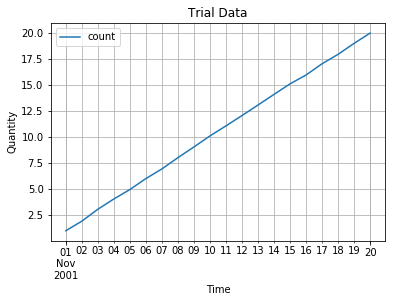

In [4]:
fig, axe = plt.subplots()
data.plot(ax=axe)
axe.set_title("Trial Data")
axe.set_xlabel("Time")
axe.set_ylabel("Quantity")
axe.grid(which='both')

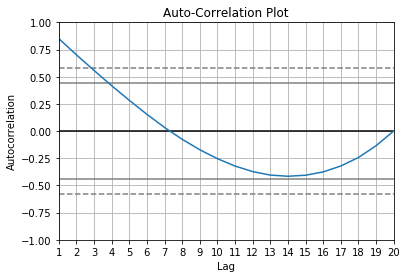

In [5]:
axe = autocorrelation_plot(data)
axe.set_xticks(np.arange(1,21,1))
_ = axe.set_title("Auto-Correlation Plot")
axe.get_figure().savefig('autocorr.png', dpi=180)

In [6]:
# Setting up ARIMA model
order = (2, 1, 2)
model = ARIMA(data, order, freq='D')
fit = model.fit()

In [7]:
print(fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   19
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  25.395
Method:                       css-mle   S.D. of innovations              0.059
Date:                Fri, 18 Jan 2019   AIC                            -38.790
Time:                        09:03:59   BIC                            -33.123
Sample:                    11-02-2001   HQIC                           -37.831
                         - 11-20-2001                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0001      0.014     73.731      0.000       0.973       1.027
ar.L1.D.count    -0.3971      0.295     -1.346      0.200      -0.975       0.181
ar.L2.D.count    -0.6571      0.230     

In [8]:
residuals = pd.DataFrame(fit.resid, columns=['residuals'])
residuals

,residuals
date,
2001-11-02,-0.084071
2001-11-03,0.115234
2001-11-04,0.035225
2001-11-05,-0.092449
2001-11-06,-0.013389
2001-11-07,-0.038218
2001-11-08,0.099190
2001-11-09,0.037663
2001-11-10,0.035188


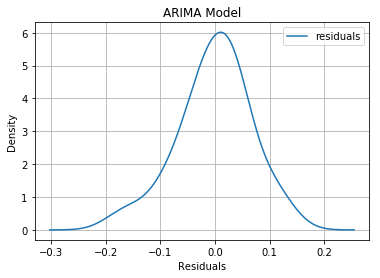

In [9]:
axe = residuals.plot(kind='kde')
axe.set_title("ARIMA Model")
axe.set_xlabel("Residuals")
axe.grid()
axe.get_figure().savefig('res.png', dpi=180)

In [10]:
residuals.describe()

,residuals
count,19.000000
mean,-0.002119
std,0.065902
min,-0.163177
25%,-0.032455
50%,0.008626
75%,0.035206
max,0.115234


In [11]:
preds = fit.predict("2001-11-02", "2001-12-15", typ='levels')
preds

2001-11-02     1.998597
2001-11-03     2.942173
2001-11-04     4.009076
2001-11-05     5.044890
2001-11-06     6.016321
2001-11-07     6.968352
2001-11-08     7.911947
2001-11-09     9.002730
2001-11-10    10.061819
2001-11-11    11.090434
2001-11-12    12.067787
2001-11-13    13.054011
2001-11-14    14.053110
2001-11-15    15.080151
2001-11-16    16.108063
2001-11-17    16.999795
2001-11-18    17.949547
2001-11-19    18.937973
2001-11-20    20.012966
2001-11-21    20.983802
2001-11-22    21.945984
2001-11-23    22.953098
2001-11-24    23.975233
2001-11-25    24.961879
2001-11-26    25.952749
2001-11-27    26.965261
2001-11-28    27.966403
2001-11-29    28.957839
2001-11-30    29.960601
2001-12-01    30.965242
2001-12-02    31.961696
2001-12-03    32.960166
2001-12-04    33.963215
2001-12-05    34.963121
2001-12-06    35.961266
2001-12-07    36.962176
2001-12-08    37.963144
2001-12-09    38.962273
2001-12-10    39.962094
2001-12-11    40.962849
2001-12-12    41.962778
2001-12-13    42

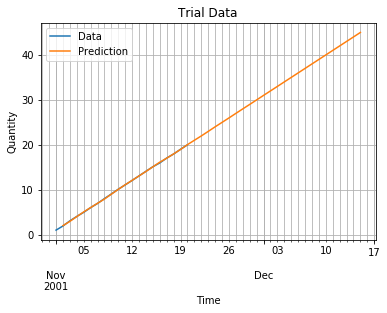

In [12]:
fig, axe = plt.subplots()
data.plot(ax=axe)
preds.plot(ax=axe)
axe.legend(["Data", "Prediction"])
axe.set_title("Trial Data")
axe.set_xlabel("Time")
axe.set_ylabel("Quantity")
axe.grid(which='both')
axe.get_figure().savefig('preds.png', dpi=180)

In [13]:
p = fit.forecast(20)
p

(array([20.98380177, 21.94598378, 22.95309801, 23.97523339, 24.96187949,
        25.95274925, 26.96526092, 27.96640274, 28.95783939, 29.96060112,
        30.9652424 , 31.96169581, 32.96016582, 33.96321506, 34.9631207 ,
        35.96126583, 36.9621757 , 37.96314441, 38.9622731 , 39.96209385]),
 array([0.05851216, 0.07115681, 0.09822632, 0.11989207, 0.1300735 ,
        0.14202927, 0.15680193, 0.16731643, 0.17624975, 0.18679748,
        0.19658732, 0.20475399, 0.21315435, 0.22173669, 0.22946405,
        0.23684052, 0.24435961, 0.25157432, 0.25839152, 0.26515842]),
 array([[20.86912005, 21.09848349],
        [21.806519  , 22.08544857],
        [22.76057797, 23.14561805],
        [23.74024926, 24.21021753],
        [24.70694011, 25.21681886],
        [25.67437699, 26.23112151],
        [26.6579348 , 27.27258705],
        [27.63846857, 28.29433691],
        [28.61239623, 29.30328256],
        [29.59448478, 30.32671745],
        [30.57993833, 31.35054647],
        [31.56038535, 32.36300626],


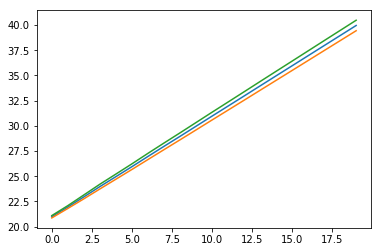

In [14]:
fig, axe = plt.subplots()
axe.plot(p[0])
axe.plot(p[2])
axe.get_figure().savefig('./output/preds.png', dpi=180)

In [15]:
import statsmodels as sm
sm.__version__

'0.9.0'